In [ ]:
import pandas as pd

import os

import matplotlib.pyplot as plt

from PIL import Image

from keras.preprocessing.image import ImageDataGenerator

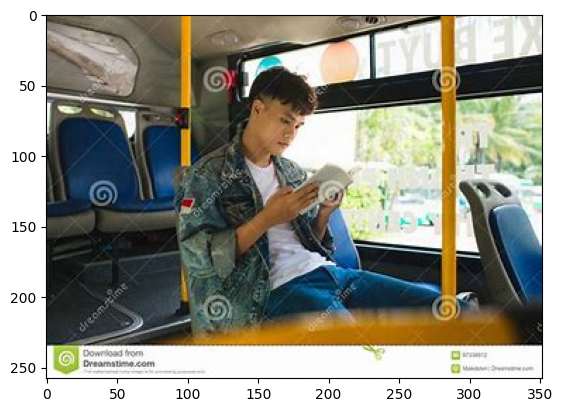

In [23]:
#inside the bus

inp_img=plt.imread("/content/drive/MyDrive/Colab Notebooks/vehcicle_safety/Input/inside/inside (102).jpeg")

plt.imshow(inp_img)

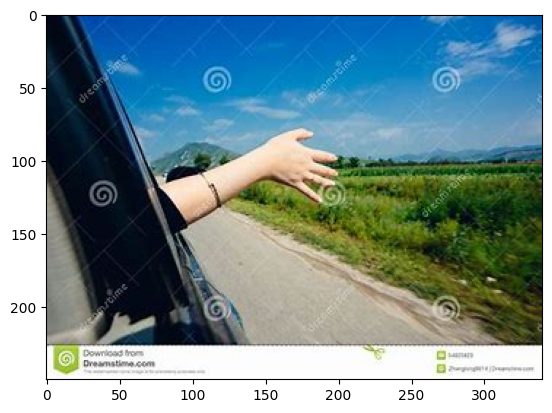

In [24]:
#hand or/and head outside the bus

inp_img=plt.imread("/content/drive/MyDrive/Colab Notebooks/vehcicle_safety/Input/outside/outside (100).jpeg")

plt.imshow(inp_img)

In [25]:
datagen=ImageDataGenerator(rotation_range=45,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           fill_mode='nearest',
                           horizontal_flip=True,
                           samplewise_center=False)

In [26]:
for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/vehcicle_safety/Input'):
  folder_path="/content/drive/MyDrive/Colab Notebooks/vehcicle_safety/Input/"+i
  for pic in os.listdir(folder_path):
    pic_path=folder_path+'/'+pic
    image=plt.imread(pic_path)
    image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])

    if pic[:3]=="ins":
      k=1
      for batch in datagen.flow(image,batch_size=1,
                                save_to_dir='/content/drive/MyDrive/Colab Notebooks/vehcicle_safety/augmentation',
                                save_prefix="ins",
                                save_format='jpg'):
        if k>10:
          break
        k+=1
    else:
      k=1
      for batch in datagen.flow(image,batch_size=1,
                                save_to_dir='/content/drive/MyDrive/Colab Notebooks/vehcicle_safety/augmentation',
                                save_prefix="out",
                                save_format='jpg'):
        if k>10:
          break
        k+=1



In [27]:
labels_list=[]

filenames_list=[]

for img_name in os.listdir('/content/drive/MyDrive/Colab Notebooks/vehcicle_safety/augmentation'):
  image=Image.open('/content/drive/MyDrive/Colab Notebooks/vehcicle_safety/augmentation/' + img_name)

  resized=image.resize((300,350))

  if img_name[:3]=="ins":

    filename='/content/drive/MyDrive/Colab Notebooks/vehcicle_safety/resized/'+img_name
    filenames_list.append(filename)
    label="ins"
    labels_list.append(label)
    resized.save(filename)

  elif img_name[:3]=="out":
    filename='/content/drive/MyDrive/Colab Notebooks/vehcicle_safety/resized/'+img_name
    filenames_list.append(filename)
    label="out"
    labels_list.append(label)
    resized.save(filename)





In [28]:
vehicle_safety=pd.DataFrame({"Filename":filenames_list,"Labels":labels_list})

vehicle_safety

,Filename,Labels
0,/content/drive/MyDrive/Colab Notebooks/vehcicl...,ins
1,/content/drive/MyDrive/Colab Notebooks/vehcicl...,ins
2,/content/drive/MyDrive/Colab Notebooks/vehcicl...,ins
3,/content/drive/MyDrive/Colab Notebooks/vehcicl...,ins
4,/content/drive/MyDrive/Colab Notebooks/vehcicl...,ins
...,...,...
2116,/content/drive/MyDrive/Colab Notebooks/vehcicl...,out
2117,/content/drive/MyDrive/Colab Notebooks/vehcicl...,out
2118,/content/drive/MyDrive/Colab Notebooks/vehcicl...,out
2119,/content/drive/MyDrive/Colab Notebooks/vehcicl...,out


In [29]:
vehicle_safety.Filename[2]

'/content/drive/MyDrive/Colab Notebooks/vehcicle_safety/resized/ins_0_9048.jpg'

In [30]:
vehicle_safety.Labels[2]

'ins'

In [32]:
vehicle_safety.to_csv("/content/drive/MyDrive/Colab Notebooks/vehcicle_safety/vehicle_safety.csv",index=False)

In [33]:
pd.read_csv("/content/drive/MyDrive/Colab Notebooks/vehcicle_safety/vehicle_safety.csv")

,Filename,Labels
0,/content/drive/MyDrive/Colab Notebooks/vehcicl...,ins
1,/content/drive/MyDrive/Colab Notebooks/vehcicl...,ins
2,/content/drive/MyDrive/Colab Notebooks/vehcicl...,ins
3,/content/drive/MyDrive/Colab Notebooks/vehcicl...,ins
4,/content/drive/MyDrive/Colab Notebooks/vehcicl...,ins
...,...,...
2116,/content/drive/MyDrive/Colab Notebooks/vehcicl...,out
2117,/content/drive/MyDrive/Colab Notebooks/vehcicl...,out
2118,/content/drive/MyDrive/Colab Notebooks/vehcicl...,out
2119,/content/drive/MyDrive/Colab Notebooks/vehcicl...,out
